# Project - Diabetes Prediction


## Members:
* <b>Rish Campbell</b>
* <b>Manuel Loaeza</b>
* <b>Rena Wang </b>




## Context:
Diabetes is one of the most frequent diseases worldwide and the number of diabetic patients is growing over the years. The main cause of diabetes remains unknown, yet scientists believe that both genetic factors and environmental lifestyle play a major role in diabetes.

Individuals with diabetes face a risk of developing some secondary health issues such as heart diseases and nerve damage. Thus, early detection and treatment of diabetes can prevent complications and assist in reducing the risk of severe health problems.
Even though it's incurable, it can be managed by treatment and medication.


## Objective:  
Develop a predictive model based on clinical and demographic data that identifies in advance individuals at risk of developing type 2 diabetes, thus providing a key tool for early intervention and personalized prevention. This model aims to improve the allocation of resources in medical care, increasing efficiency and cost-effectiveness in the treatment of diabetes. By providing a basis for education and awareness programs, the project also seeks to encourage healthy lifestyles within the at-risk population. Furthermore, the model is intended to serve as a support system for clinical decisions, facilitating the personalization of treatment and management of already diagnosed patients to prevent complications and improve quality of life. With a focus on ethics and data privacy, the project will align with data protection regulations and seek to promote equitable and non-discriminatory care.

## Data Description:
The dataset represents 10 years (1999-2008) of clinical care at 130 US hospitals and integrated delivery networks. It includes over 50 features representing patient and hospital outcomes. Information was extracted from the database for encounters that satisfied the following criteria:

  (1) It is an inpatient encounter (a hospital admission).

  (2) It is a diabetic encounter, that is, one during which any kind of diabetes was entered to the system as a diagnosis.

  (3) The length of stay was at least 1 day and at most 14 days.

  (4) Laboratory tests were performed during the encounter.
  
  (5) Medications were administered during the encounter.

* The data contains such attributes as patient number, race, gender, age, admission type, time in hospital, medical specialty of admitting physician, number of lab test performed, HbA1c test result, diagnosis, number of medication, diabetic medications, number of outpatient, inpatient, and emergency visits in the year before the hospitalization, etc.

* 24 features for medications For the generic names: metformin, repaglinide, nateglinide, chlorpropamide, glimepiride, acetohexamide, glipizide, glyburide, tolbutamide, pioglitazone, rosiglitazone, acarbose, miglitol, troglitazone, tolazamide, examide, sitagliptin, insulin, glyburide-metformin, glipizide-metformin, glimepiride-pioglitazone, metformin-rosiglitazone, and metformin-pioglitazone, the feature indicates whether the drug was prescribed or there was a change in the dosage. Values: “up” if the dosage was increased during the encounter, “down” if the dosage was decreased, “steady” if the dosage did not change, and “no” if the drug was not prescribed


### Import libraries

In [ ]:
# Reading and manipulating data libraries
import numpy as np
import pandas as pd

# Data visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt
import folium
import matplotlib.cm as cm
import matplotlib.colors as colors
sns.set(style="whitegrid") #whitegrids plots

#Interactive plots
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import plotly
import plotly.express as px

#Background at graphs
sns.set(color_codes=True)

#Modellin libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import chi2
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree

#Model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
from sklearn import metrics
from sklearn.metrics import confusion_matrix,  precision_score, recall_score,f1_score,roc_auc_score


#Cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

#Imputation for completing missing values using k-Nearest Neighbors.
from sklearn.impute import KNNImputer

#Chi-squared
from scipy.stats import chi2_contingency

# To build statsmodels using scipy
import scipy as sp
import itertools
from scipy import stats

# Library to suppress warnings or deprecation notes
import warnings
warnings.filterwarnings('ignore')

# Preprocessing

### Load the datasets

### To run in Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#To read in Google Colab
data_diabetes= pd.read_csv('/content/drive/My Drive/IEOR 256 Healthcare Analytics Project/diabetes.csv')
data_diabetes.head(5)

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [ ]:
data_diabetes.shape

(101766, 51)

### Feature engineering

In [ ]:
# Identificación de valores faltantes para cada conjunto de datos
data_diabetes.isnull().sum()

id                              0
encounter_id                    0
patient_nbr                     0
race                            0
gender                          0
age                             0
weight                          0
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                      0
medical_specialty               0
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                          0
diag_2                          0
diag_3                          0
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

* Treatment "?"

In [ ]:
data_diabetes = data_diabetes.replace("?", np.NaN, )
data_diabetes

,id,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,1,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,...,No,No,No,No,No,No,No,No,No,NO
1,2,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,3,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,...,No,No,No,No,No,No,No,No,Yes,NO
3,4,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,5,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,...,No,Steady,No,No,No,No,No,Ch,Yes,NO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101761,101762,443847548,100162476,AfricanAmerican,Male,[70-80),NaN,1,3,7,...,No,Down,No,No,No,No,No,Ch,Yes,>30
101762,101763,443847782,74694222,AfricanAmerican,Female,[80-90),NaN,1,4,5,...,No,Steady,No,No,No,No,No,No,Yes,NO
101763,101764,443854148,41088789,Caucasian,Male,[70-80),NaN,1,1,7,...,No,Down,No,No,No,No,No,Ch,Yes,NO
101764,101765,443857166,31693671,Caucasian,Female,[80-90),NaN,2,3,7,...,No,Up,No,No,No,No,No,Ch,Yes,NO


In [ ]:
data_diabetes.isnull().sum()

id                              0
encounter_id                    0
patient_nbr                     0
race                         2273
gender                          0
age                             0
weight                      98569
admission_type_id               0
discharge_disposition_id        0
admission_source_id             0
time_in_hospital                0
payer_code                  40256
medical_specialty           49949
num_lab_procedures              0
num_procedures                  0
num_medications                 0
number_outpatient               0
number_emergency                0
number_inpatient                0
diag_1                         21
diag_2                        358
diag_3                       1423
number_diagnoses                0
max_glu_serum               96420
A1Cresult                   84748
metformin                       0
repaglinide                     0
nateglinide                     0
chlorpropamide                  0
glimepiride   

In [ ]:
data_diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   id                        101766 non-null  int64 
 1   encounter_id              101766 non-null  int64 
 2   patient_nbr               101766 non-null  int64 
 3   race                      99493 non-null   object
 4   gender                    101766 non-null  object
 5   age                       101766 non-null  object
 6   weight                    3197 non-null    object
 7   admission_type_id         101766 non-null  int64 
 8   discharge_disposition_id  101766 non-null  int64 
 9   admission_source_id       101766 non-null  int64 
 10  time_in_hospital          101766 non-null  int64 
 11  payer_code                61510 non-null   object
 12  medical_specialty         51817 non-null   object
 13  num_lab_procedures        101766 non-null  int64 
 14  num_

In [ ]:
# Imputation for categorical data with mode
cat_columns = ['race', 'weight', 'payer_code', 'medical_specialty','diag_1','diag_2','diag_3','max_glu_serum','A1Cresult']

cat_imputer = SimpleImputer(strategy='most_frequent')
data_diabetes[cat_columns] = cat_imputer.fit_transform(data_diabetes[cat_columns])
data_diabetes.isnull().sum()

id                          0
encounter_id                0
patient_nbr                 0
race                        0
gender                      0
age                         0
weight                      0
admission_type_id           0
discharge_disposition_id    0
admission_source_id         0
time_in_hospital            0
payer_code                  0
medical_specialty           0
num_lab_procedures          0
num_procedures              0
num_medications             0
number_outpatient           0
number_emergency            0
number_inpatient            0
diag_1                      0
diag_2                      0
diag_3                      0
number_diagnoses            0
max_glu_serum               0
A1Cresult                   0
metformin                   0
repaglinide                 0
nateglinide                 0
chlorpropamide              0
glimepiride                 0
acetohexamide               0
glipizide                   0
glyburide                   0
tolbutamid

* Now we do not have missing values

### Drop it some columns
    * id, encounter_id, patient_nbr

In [ ]:
columns_to_drop = ['id', 'encounter_id','patient_nbr' ]
data_diabetes.drop(columns_to_drop, axis=1, inplace=True)
data_diabetes.head()

,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,...,citoglipton,insulin,glyburide.metformin,glipizide.metformin,glimepiride.pioglitazone,metformin.rosiglitazone,metformin.pioglitazone,change,diabetesMed,readmitted
0,Caucasian,Female,[0-10),[75-100),6,25,1,1,MC,Pediatrics-Endocrinology,...,No,No,No,No,No,No,No,No,No,NO
1,Caucasian,Female,[10-20),[75-100),1,1,7,3,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,>30
2,AfricanAmerican,Female,[20-30),[75-100),1,1,7,2,MC,InternalMedicine,...,No,No,No,No,No,No,No,No,Yes,NO
3,Caucasian,Male,[30-40),[75-100),1,1,7,2,MC,InternalMedicine,...,No,Up,No,No,No,No,No,Ch,Yes,NO
4,Caucasian,Male,[40-50),[75-100),1,1,7,1,MC,InternalMedicine,...,No,Steady,No,No,No,No,No,Ch,Yes,NO


### Encoder for Numerical and Categorical Columns

In [ ]:
# Convertir 'gender' to 0 and 1
gender_encoder = LabelEncoder()
data_diabetes['gender'] = gender_encoder.fit_transform(data_diabetes['gender'])  # Female: 0, Male: 1

* DiabetesMed change to Numerical Column

In [ ]:
unique_values = data_diabetes['diabetesMed'].unique()
print(f"Unique values 'diabetesMed': {unique_values}")

value_counts = data_diabetes['diabetesMed'].value_counts()
print(f"Frequency for 'diabetesMed':\n{value_counts}")

Unique values 'diabetesMed': ['No' 'Yes']
Frequency for 'diabetesMed':
diabetesMed
Yes    78363
No     23403
Name: count, dtype: int64


In [ ]:
data_diabetes['diabetesMed'] = data_diabetes['diabetesMed'].map({'Yes': 1, 'No': 0})

In [ ]:
binary_columns = []

for column in data_diabetes.columns:
    unique_values = data_diabetes[column].unique()
    if set(unique_values) <= {'Yes', 'No'}:
        binary_columns.append(column)

print("Columns with 'Yes' and 'No':", binary_columns)

Columns with 'Yes' and 'No': ['examide', 'citoglipton']


In [ ]:
data_diabetes['examide'] = data_diabetes['examide'].map({'Yes': 1, 'No': 0})
data_diabetes['citoglipton'] = data_diabetes['citoglipton'].map({'Yes': 1, 'No': 0})

* Race Distribution

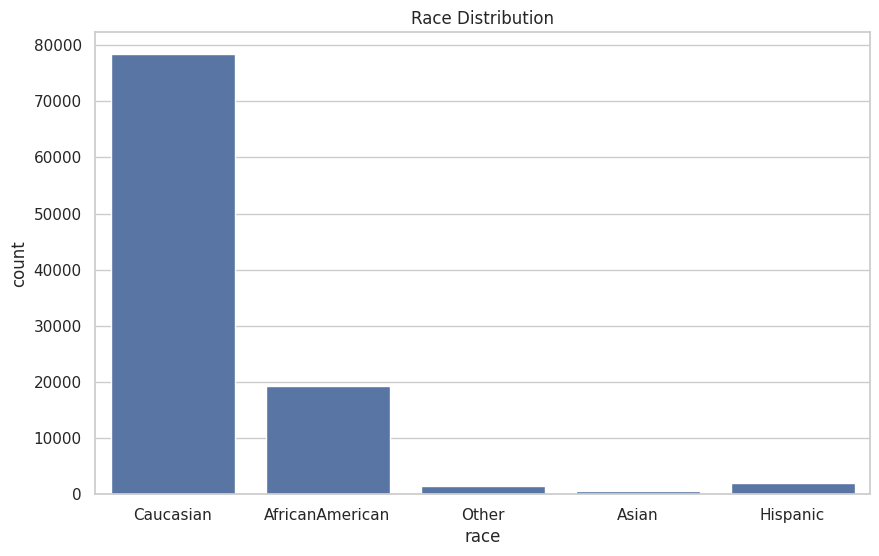

In [ ]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.countplot(data=data_diabetes, x='race')
plt.title('Race Distribution')
plt.show()

**Observations**

* Caucasian is the top of the race
* We will not modify it, hoping to build models with and without the race characteristic to see how it affects the predictive ability of the model and whether its inclusion introduces any bias.

* Age Distribution

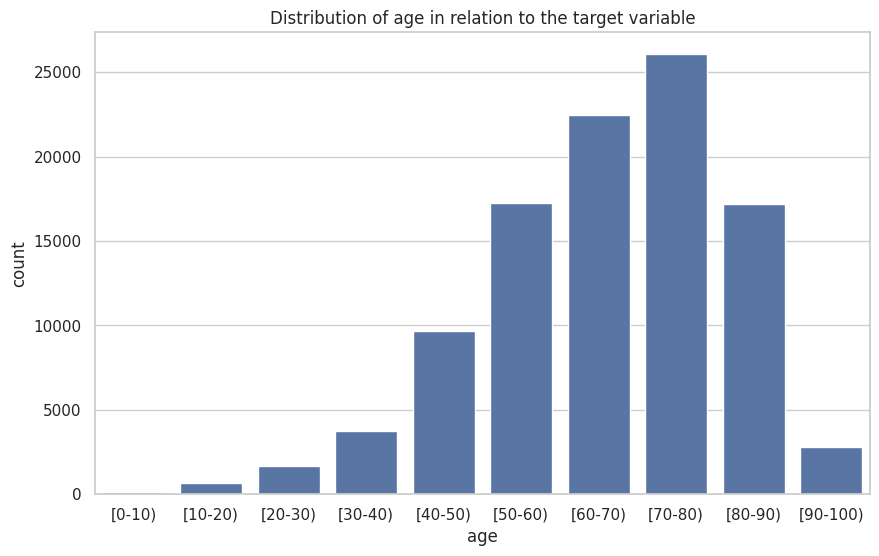

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(data=data_diabetes, x='age')
plt.title('Distribution of age in relation to the target variable')
plt.show()

**Observations**

* The top is [70,80)
* We will not modify it, hoping to build models with and without the group of ages characteristic to see how it affects the predictive ability of the model and whether its inclusion introduces any bias.

* Weigth Distribution

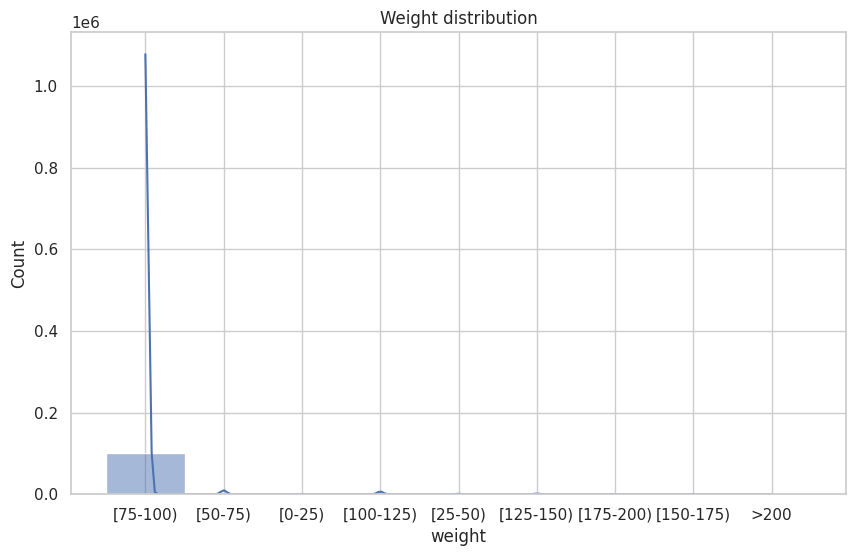

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data=data_diabetes, x='weight', bins=10, kde=True)
plt.title('Weight distribution')
plt.show()

**Observations**

* The 'weight' column had many NaN values and the imputation of the mean has created a dominant category, this could bias any analysis or predictive model so we will remove it


In [ ]:
columns_to_drop = ['weight']
data_diabetes.drop(columns_to_drop, axis=1, inplace=True)

#### Check the frequency of categorical variables to treatment.

In [ ]:
medications = ['glyburide.metformin', 'glipizide.metformin', 'glimepiride.pioglitazone', 'metformin.rosiglitazone','metformin.pioglitazone', 'insulin', 'change']

for med in medications:
    print(f"Frecuency {med}:")
    print(data_diabetes[med].value_counts())
    print("\n")

Frecuency glyburide.metformin:
glyburide.metformin
No        101060
Steady       692
Up             8
Down           6
Name: count, dtype: int64


Frecuency glipizide.metformin:
glipizide.metformin
No        101753
Steady        13
Name: count, dtype: int64


Frecuency glimepiride.pioglitazone:
glimepiride.pioglitazone
No        101765
Steady         1
Name: count, dtype: int64


Frecuency metformin.rosiglitazone:
metformin.rosiglitazone
No        101764
Steady         2
Name: count, dtype: int64


Frecuency metformin.pioglitazone:
metformin.pioglitazone
No        101765
Steady         1
Name: count, dtype: int64


Frecuency insulin:
insulin
No        47383
Steady    30849
Down      12218
Up        11316
Name: count, dtype: int64


Frecuency change:
change
No    54755
Ch    47011
Name: count, dtype: int64




#### Given the medications and their explanation

* Insulin: Commonly prescribed to manage both type 1 and type 2 diabetes.
* Metformin: It is one of the first-line medications for the treatment of type 2 diabetes.
* Glipizide and Glyburide: They are sulfonylureas, which are used to treat type 2 diabetes by increasing the release of insulin.
* Pioglitazone and Rosiglitazone: Part of a group of medications called thiazolidinediones, used in the treatment of type 2 diabetes.
* Glimepiride: Another sulfonylurea for the treatment of type 2 diabetes.

**These columns will be eliminated to avoid data leakage**

In [ ]:
medications = ['glyburide.metformin', 'glipizide.metformin', 'glimepiride.pioglitazone', 'metformin.rosiglitazone','metformin.pioglitazone','metformin', 'repaglinide', 'nateglinide', 'chlorpropamide','glimepiride','acetohexamide','glipizide','tolbutamide','pioglitazone','rosiglitazone','acarbose','miglitol','troglitazone','tolazamide','glyburide']
data_diabetes.drop(medications, axis=1, inplace=True)

* The 'insulin' column has a more balanced distribution of values.

In [ ]:
print(f"Frecuency insuline:")
print(data_diabetes['insulin'].value_counts())

Frecuency insuline:
insulin
No        47383
Steady    30849
Down      12218
Up        11316
Name: count, dtype: int64


* Since the model will be designed to identify individuals who may have undiagnosed diabetes, then information on insulin use could lead to a data leak. In this case, we will delete it.

In [ ]:
data_diabetes.drop('insulin', axis=1, inplace=True)

In [ ]:
# To convert 'No' to 0 y 'Ch' to 1
data_diabetes['change'] = data_diabetes['change'].map({'No': 0, 'Ch': 1})

### More treatment to categorical variable

* Keep the categories at a significantly high frequency and combine the others into an 'Other' category.

In [ ]:
# To define a umbral
umbral = 0.1  # 10% of the total

# For payer_code
payer_counts = data_diabetes['payer_code'].value_counts(normalize=True)
other_payers = payer_counts[payer_counts < umbral].index
data_diabetes['payer_code'] = data_diabetes['payer_code'].replace(other_payers, 'Other')

# For medical_specialty
specialty_counts = data_diabetes['medical_specialty'].value_counts(normalize=True)
other_specialties = specialty_counts[specialty_counts < umbral].index
data_diabetes['medical_specialty'] = data_diabetes['medical_specialty'].replace(other_specialties, 'Other')

* Ordinal Codificication for Readmitted

In [ ]:
data_diabetes['readmitted'] = data_diabetes['readmitted'].map({'NO': 0, '>30': 1, '<30': 2})

* Diagnotic Codes treatment

In [ ]:
# Count unique groups based on the first character for 'diag_1'
unique_groups_diag1 = data_diabetes['diag_1'].str[0].nunique()
print(f"Number of unique groups in 'diag_1' based on first character: {unique_groups_diag1}")

unique_groups_diag2 = data_diabetes['diag_2'].str[0].nunique()
print(f"Number of unique groups in 'diag_2' based on first character: {unique_groups_diag2}")

unique_groups_diag3 = data_diabetes['diag_3'].str[0].nunique()
print(f"Number of unique groups in 'diag_3' based on first character: {unique_groups_diag3}")

Number of unique groups in 'diag_1' based on first character: 11
Number of unique groups in 'diag_2' based on first character: 11
Number of unique groups in 'diag_3' based on first character: 11


In [ ]:
# Group codes by the first character or number.
data_diabetes['diag_1_grouped'] = data_diabetes['diag_1'].str[0]
data_diabetes['diag_2_grouped'] = data_diabetes['diag_2'].str[0]
data_diabetes['diag_3_grouped'] = data_diabetes['diag_3'].str[0]

one_hot_encoder = OneHotEncoder(sparse=False)
diag_1_grouped_ohe = one_hot_encoder.fit_transform(data_diabetes[['diag_1_grouped']])
diag_2_grouped_ohe = one_hot_encoder.fit_transform(data_diabetes[['diag_2_grouped']])
diag_3_grouped_ohe = one_hot_encoder.fit_transform(data_diabetes[['diag_3_grouped']])

In [ ]:
data_diabetes.drop('diag_1', axis=1, inplace=True)
data_diabetes.drop('diag_2', axis=1, inplace=True)
data_diabetes.drop('diag_3', axis=1, inplace=True)

* Descriptive Analysis of all categorical variables

In [ ]:
# Descriptive analysis for all categorical variables
for column in data_diabetes.select_dtypes(include='object').columns:
    print(data_diabetes[column].value_counts(normalize=True))  # Usa normalize=True para obtener proporciones en lugar de recuentos
    print("\n")

race
Caucasian          0.770120
AfricanAmerican    0.188766
Hispanic           0.020017
Other              0.014799
Asian              0.006299
Name: proportion, dtype: float64


age
[70-80)     0.256156
[60-70)     0.220928
[50-60)     0.169565
[80-90)     0.168986
[40-50)     0.095169
[30-40)     0.037095
[90-100)    0.027445
[20-30)     0.016282
[10-20)     0.006790
[0-10)      0.001582
Name: proportion, dtype: float64


payer_code
MC       0.714335
Other    0.285665
Name: proportion, dtype: float64


medical_specialty
InternalMedicine    0.634632
Other               0.365368
Name: proportion, dtype: float64


max_glu_serum
Norm    0.972987
>200    0.014592
>300    0.012421
Name: proportion, dtype: float64


A1Cresult
>8      0.913507
Norm    0.049034
>7      0.037458
Name: proportion, dtype: float64


diag_1_grouped
4    0.376530
5    0.155808
2    0.150001
7    0.128520
9    0.038569
6    0.037311
8    0.035729
3    0.034393
1    0.026974
V    0.016155
E    0.000010
Name: proport

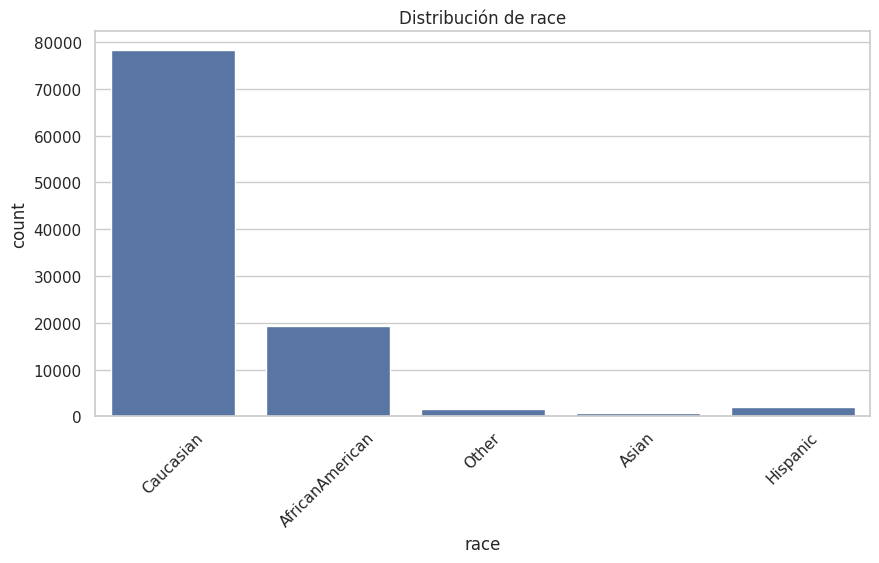

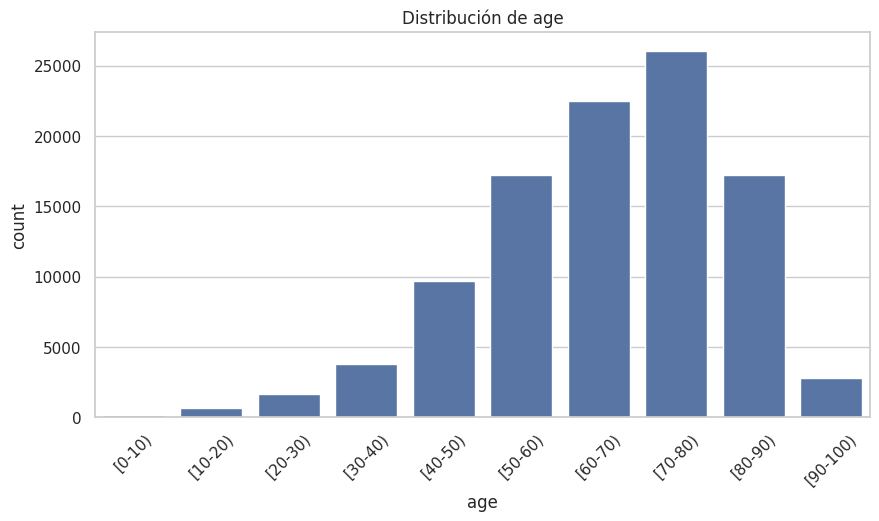

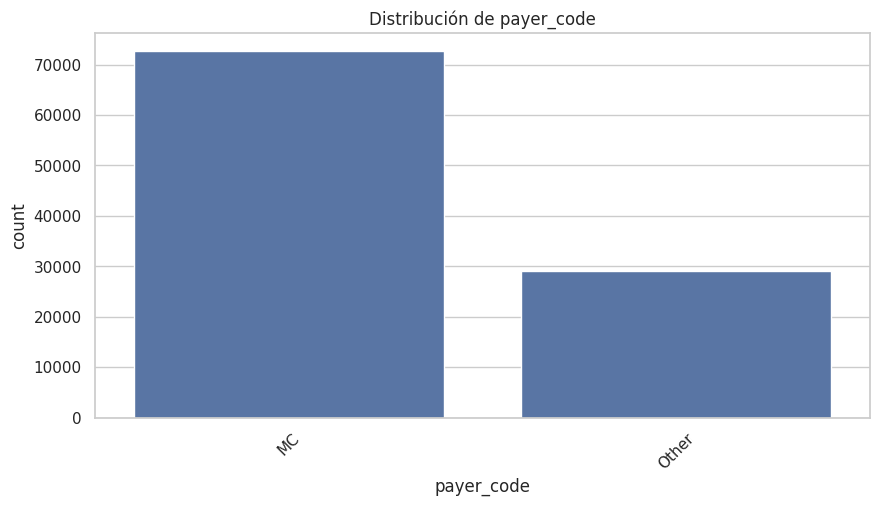

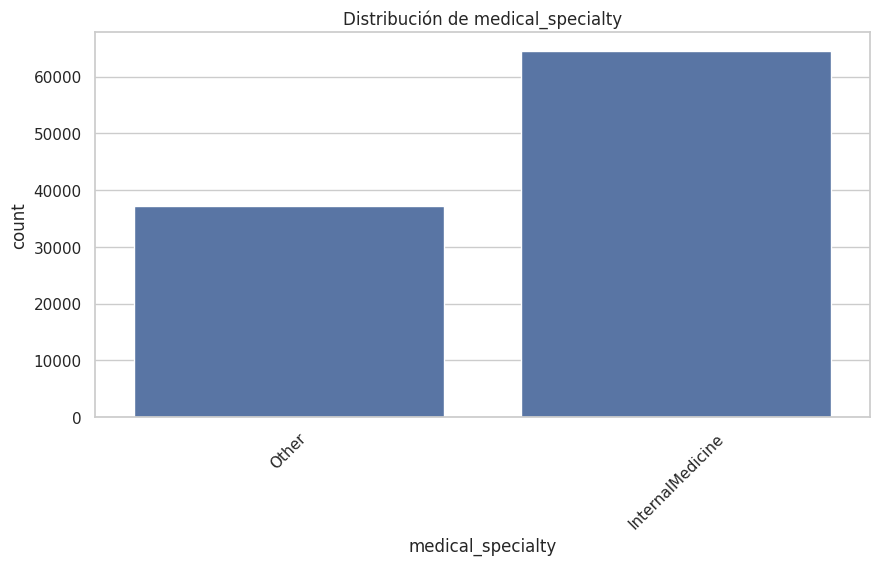

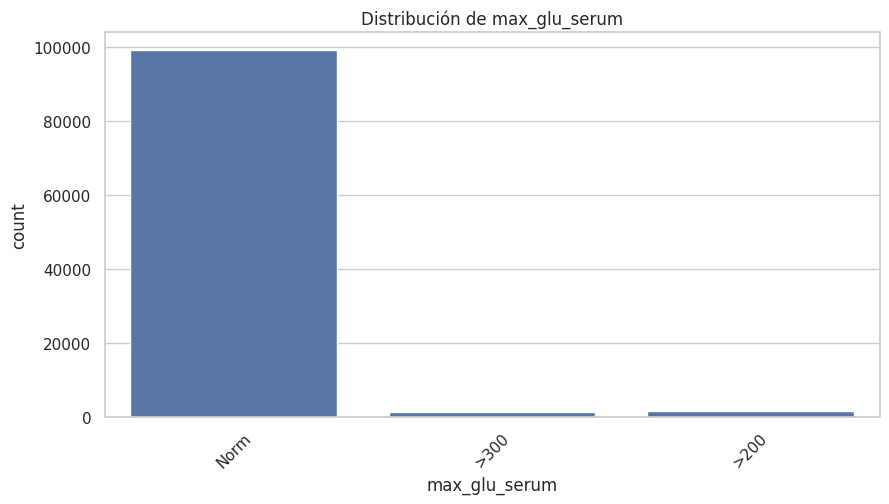

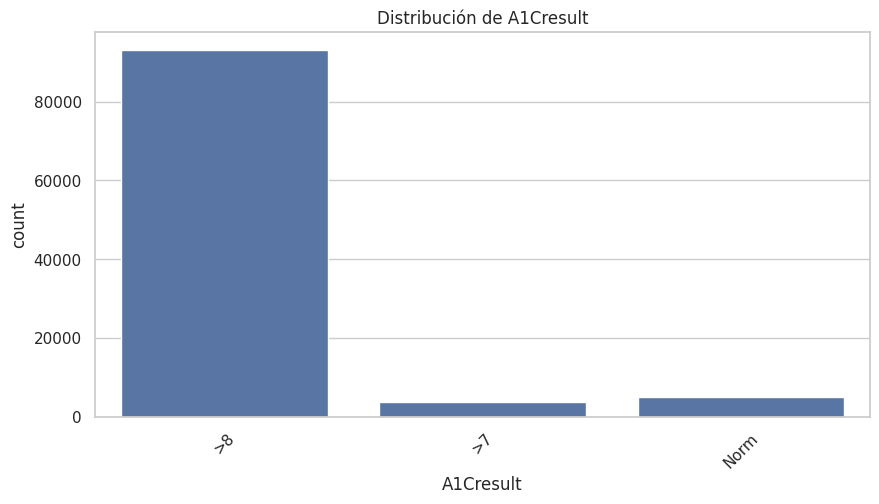

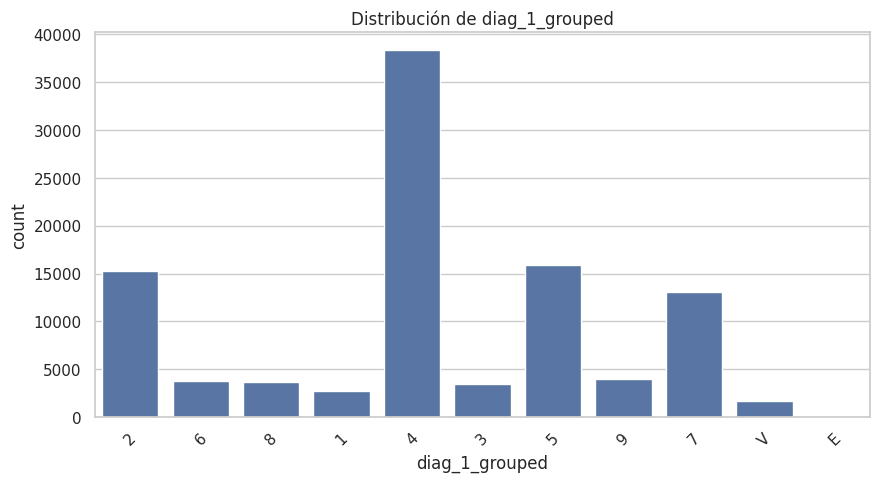

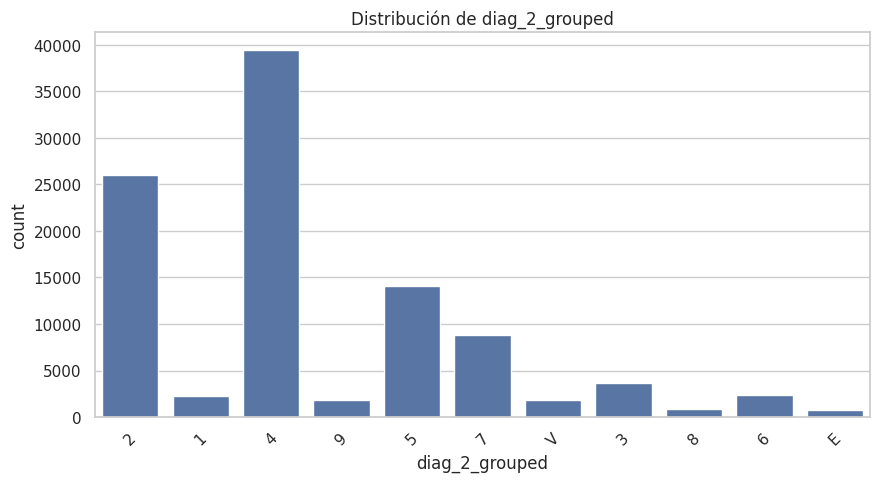

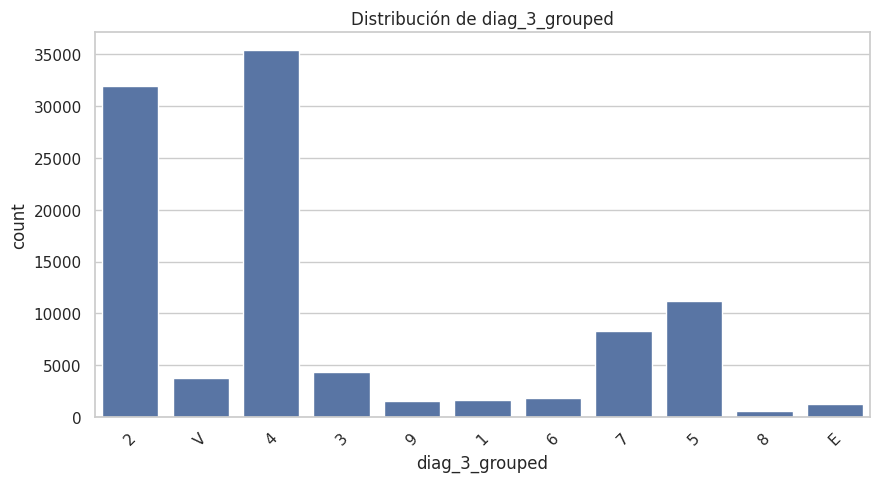

In [ ]:
# Viewing category distributions
for column in data_diabetes.select_dtypes(include='object').columns:
    plt.figure(figsize=(10, 5))
    sns.countplot(data=data_diabetes, x=column)
    plt.title(f'Distribución de {column}')
    plt.xticks(rotation=45)
    plt.show()

### Shape of the diabetes dataset

In [ ]:
data_diabetes.shape

(101766, 26)

# EDA

### Relation between age range and diabetesMed

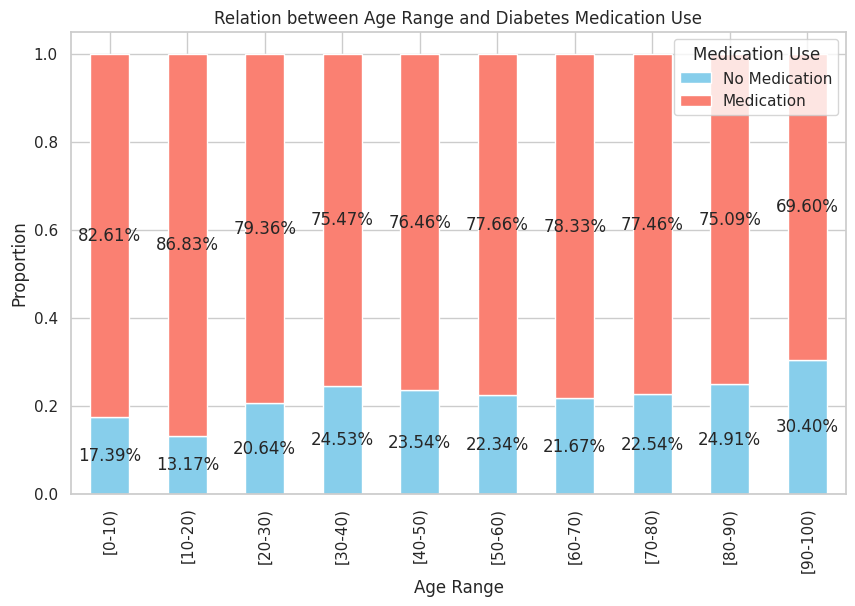

In [ ]:
age_medication_counts = data_diabetes.groupby(['age', 'diabetesMed']).size().unstack(fill_value=0)

age_medication_counts.columns = ['No Medication', 'Medication']
age_medication_counts['Total'] = age_medication_counts.sum(axis=1)
age_medication_counts['No Medication'] = age_medication_counts['No Medication'] / age_medication_counts['Total']
age_medication_counts['Medication'] = age_medication_counts['Medication'] / age_medication_counts['Total']

# To graph
ax = age_medication_counts[['No Medication', 'Medication']].plot(kind='bar', stacked=True, color=['skyblue', 'salmon'], figsize=(10, 6))
ax.set_title('Relation between Age Range and Diabetes Medication Use')
ax.set_xlabel('Age Range')
ax.set_ylabel('Proportion')
ax.legend(title='Medication Use')

for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    if height > 0.05:
        x, y = p.get_xy()
        ax.text(x+width/2,
                y+height/2,
                f'{height:.2%}',
                horizontalalignment='center',
                verticalalignment='center')

plt.show()

**Observations**
* A clear increase is observed in the percentage of people using medication as the age ranges advance, starting from 17.39% in the 0-10 years group to reaching 30.40% in the 90-100 years group. This pattern suggests that the prevalence of diabetes or the need for medication increases with age, which is consistent with the general understanding that the risk of type 2 diabetes increases with age.

* In the older age groups (80-90 and 90-100), the percentage of medication use is significantly higher compared to the younger groups. This could reflect both a higher diagnosis and a higher severity of diabetes in these groups.

* Between the ages of 20-60, the proportions of medication use remain relatively stable, fluctuating around 76%-79%. This could indicate that, once diagnosed and started on treatment, patients maintain a consistent medication regimen for most of adulthood.

### Number of patients with Diabetes



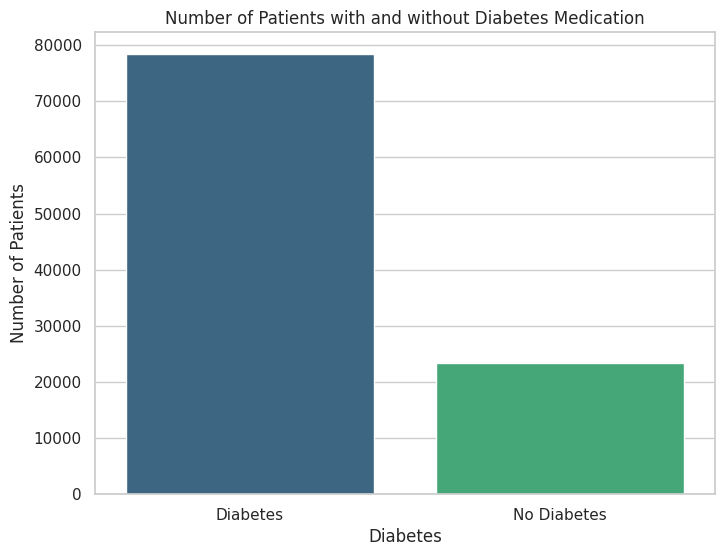

In [ ]:
medication_counts = data_diabetes['diabetesMed'].value_counts()

# Convertir a DataFrame para mejor manipulación y visualización
medication_df = medication_counts.reset_index()
medication_df.columns = ['Diabetes', 'Number of Patients']
medication_df['Diabetes'] = medication_df['Diabetes'].map({1: 'Diabetes', 0: 'No Diabetes'})

# Gráfico de barras para visualizar el número de pacientes
plt.figure(figsize=(8, 6))
sns.barplot(x='Diabetes', y='Number of Patients', data=medication_df, palette='viridis')
plt.title('Number of Patients with and without Diabetes Medication')
plt.xlabel('Diabetes')
plt.ylabel('Number of Patients')
plt.show()

**Observations**

* A large majority of the patients in the data set are taking diabetes medication. This indicates a high prevalence of active disease management within the population studied.

* The fact that so many patients require medication may reflect a high rate of diabetes within this specific population or may indicate a proactive treatment policy by healthcare providers.

* The high number of patients on medication may point to the need for intensive diabetes prevention or disease management programs to reduce incidence and improve long-term health outcomes.

### A1C Distribution

**CDC URL**
https://www.cdc.gov/diabetes/managing/managing-blood-sugar/a1c.html#:~:text=Your%20A1C%20Result&text=A%20normal%20A1C%20level%20is,for%20developing%20type%202%20diabetes.

**Normal**: Less than 5.7%
**Prediabetes**: Between 5.7% and 6.4%
**Diabetes**: 6.5% or more

A normal A1C level is less than 5.7%, a level of 5.7% to 6.4% indicates prediabetes, and a level of 6.5% or higher indicates diabetes. Within the range of 5.7% to 6.4% prediabetes, the higher the A1C, the greater the risk of developing type 2 diabetes.

* Diabetes Management

The A1C result can also be reported as estimated average glucose (eAG), the same numbers (mg/dL) you're used to seeing on your glucose meter:

| A1C % | eAG mg/dL |
|-------|-----------|
| 7     | 154       |
| 8     | 183       |
| 9     | 212       |
| 10    | 240       |

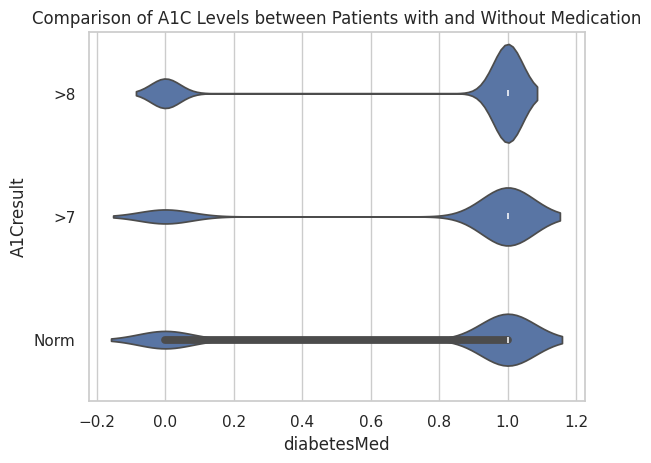

             count unique top   freq
diabetesMed                         
0            23403      3  >8  21406
1            78363      3  >8  71558


In [ ]:
sns.violinplot(x='diabetesMed', y='A1Cresult', data=data_diabetes)
plt.title('Comparison of A1C Levels between Patients with and Without Medication')
plt.show()

print(data_diabetes.groupby('diabetesMed')['A1Cresult'].describe())

**Observations**

* Patients without Medication (0 in diabetesMed): The distribution of A1C in this group shows a denser concentration at normal levels (less than 7), indicating good glucose control in the majority of these patients. However, there are also higher values, which may suggest that some patients are at risk or already have diabetes but are not medicated.
* Patients on Medication (1 in diabetesMed): This group shows a broader distribution of A1C levels, with a visible concentration at levels above 7. This could indicate that, although patients are on medication, a significant number of them still have A1C levels that would be considered poorly controlled.
* In both groups there are outliers that are significantly higher than the majority of the data. In the medical context, this could mean that there are patients in each group who have extremely poor control of their diabetes or prediabetes, which could require additional interventions or adjustments to their treatment plan.

**Clinical Implications**
* Although many show normal A1C levels, the presence of higher values suggests that some may benefit from more frequent testing or starting treatment.
* The wide variation and high levels of A1C suggest that the current medication regimen may not be effective for all patients. This may indicate the need to review applied therapies, consider different medications, or intensify other aspects of diabetes management such as diet and exercise.

In [ ]:
from ipywidgets import interact, Dropdown

def plot_data(column):
    plt.figure(figsize=(12, 6))
    sns.violinplot(x=column, y='A1Cresult', data=data_diabetes)
    plt.title(f'Comparison of A1C by {column}')
    plt.xticks(rotation=45)
    plt.show()

# Crear un widget interactivo
interact(plot_data, column=Dropdown(options=['race', 'age', 'gender'], value='race', description='Category:'))

interactive(children=(Dropdown(description='Category:', options=('race', 'age', 'gender'), value='race'), Outp…

<function __main__.plot_data(column)>

**Comparison of A1C by Race**

* The groups show significant variations in the distribution of A1C levels, which may indicate differences in diabetes control or socioeconomic and healthcare access factors.
Groups such as "AfricanAmerican" and "Hispanic" show a broader distribution and higher A1C levels compared to "Caucasian", possibly suggesting less effective diabetes control.

**Comparison of A1C by Age**

* The distribution of A1C changes with age. Younger groups tend to have narrower distributions centered at lower levels, which is positive. However, as age increases, so does the variability and level of A1C, which is consistent with increased risk and complexity in diabetes management in older populations.

**Comparison of A1C by Gender**

* The difference in the distribution of A1C between genders is not very pronounced, although there appears to be a slight difference in the dispersion between genders, which could be further explored in specific studies to determine if there are significant differences in the control or treatment of A1C. diabetes among men and women.

### Change Medication, Serum & Readmitted

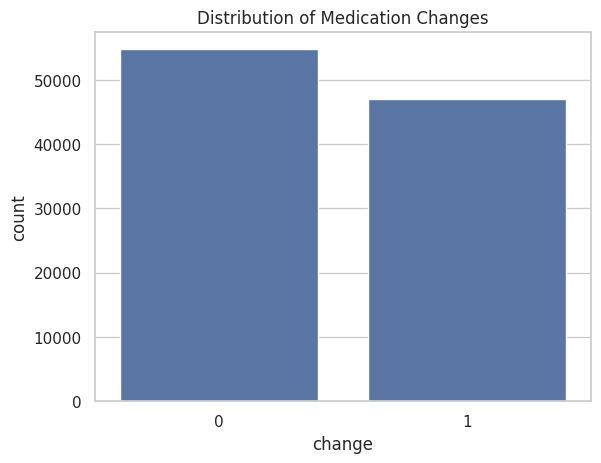

In [ ]:
sns.countplot(x='change', data=data_diabetes)
plt.title('Distribution of Medication Changes')
plt.show()

**Observations**

* The distribution of medication changes across patients is fairly balanced, with slightly fewer patients who have not changed their medication (0) compared to those who have (1). This suggests that almost half of patients have required some adjustment to their treatment.

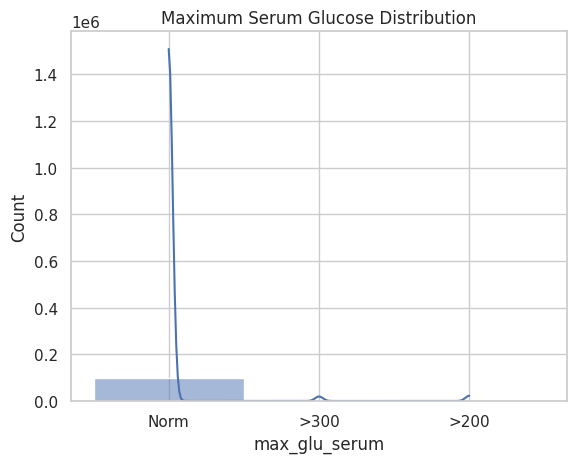

In [ ]:
sns.histplot(data=data_diabetes, x='max_glu_serum', kde=True)
plt.title('Maximum Serum Glucose Distribution')
plt.show()

**Observations**

* A large majority of serum glucose measurements are in the normal ("Norm") range. This suggests that the majority of patients in this data set maintain their glucose levels within a range considered normal, which is indicative of good glucose control or a less severe population in terms of hyperglycemia.
* The ">300" category, which represents extremely high blood glucose levels, has very few cases compared to the normal category. This is positive since such high levels may indicate a significant risk of serious complications, including diabetic ketoacidosis.
* Levels ">200" are also relatively low compared to normal, which is still a good sign in terms of overall glucose control in the population studied. However, these levels still pose a risk and require medical attention to prevent worsening of the condition.

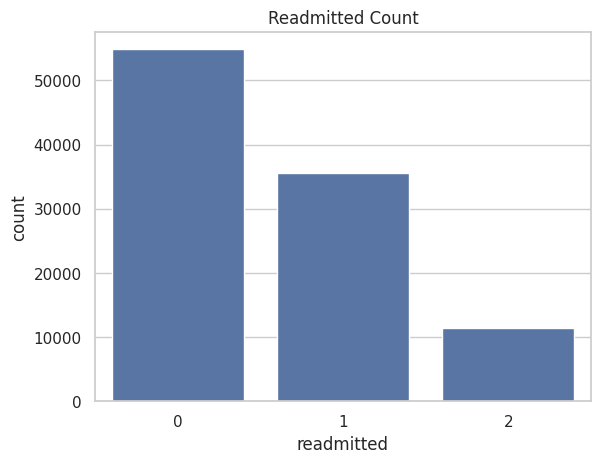

In [ ]:
sns.countplot(x='readmitted', data=data_diabetes)
plt.title('Readmitted Count')
plt.show()

**Observations**

* Given 'NO': 0, '>30': 1, '<30': 2
* Although readmissions in less than 30 days are relatively low, any effort to reduce these numbers can significantly improve the quality of care and reduce costs for health systems. It is important to investigate the underlying causes of these rapid readmissions to design effective interventions.
* Post-discharge care should be optimized, especially for those at risk of being readmitted after 30 days. Follow-up programs, patient education, and ongoing support may be necessary to manage chronic conditions and prevent exacerbations.
* Further analysis should be conducted to better understand the factors associated with readmissions, particularly rapid readmissions. This could include examining disease severity, comorbidities, patient compliance with the treatment regimen, and socioeconomic factors.

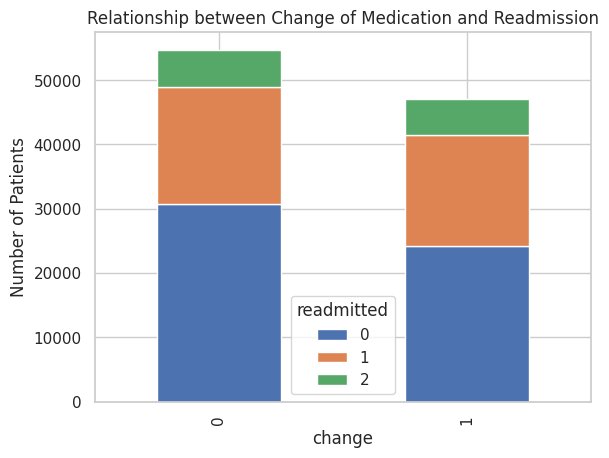

In [ ]:
ct = pd.crosstab(data_diabetes['change'], data_diabetes['readmitted'])
ct.plot(kind='bar', stacked=True)
plt.title('Relationship between Change of Medication and Readmission')
plt.ylabel('Number of Patients')
plt.show()

**Observations**

* We observed that the majority of patients who had no changes in their medication were not readmitted (blue), which may suggest stability in their condition that does not require adjustments in their treatment or adequate initial effectiveness of the prescribed therapy.
However, there are a notable number of patients in this group who were readmitted both in less than 30 days and after 30 days, which could indicate underlying conditions that eventually require hospitalization.
* Compared with the no change group, patients who did have changes in their medication show slightly higher proportions of readmissions both before and after 30 days. This could reflect that medication adjustments were not completely effective, or that these patients have a more volatile or severe condition requiring frequent adjustments and possible rehospitalizations.
* The proportion of no readmissions remains the highest in both groups, but the group with medication changes has a lower percentage of no readmissions compared to the group without changes, suggesting a slightly higher risk of complications or instabilities requiring hospital care.

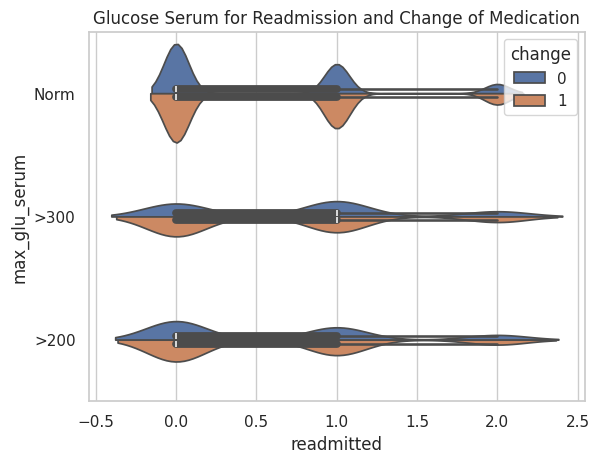

In [ ]:
sns.violinplot(x='readmitted', y='max_glu_serum', hue='change', data=data_diabetes, split=True)
plt.title('Glucose Serum for Readmission and Change of Medication')
plt.show()

### Correlation

In [ ]:
df_numeric = data_diabetes.select_dtypes(include=[np.number])

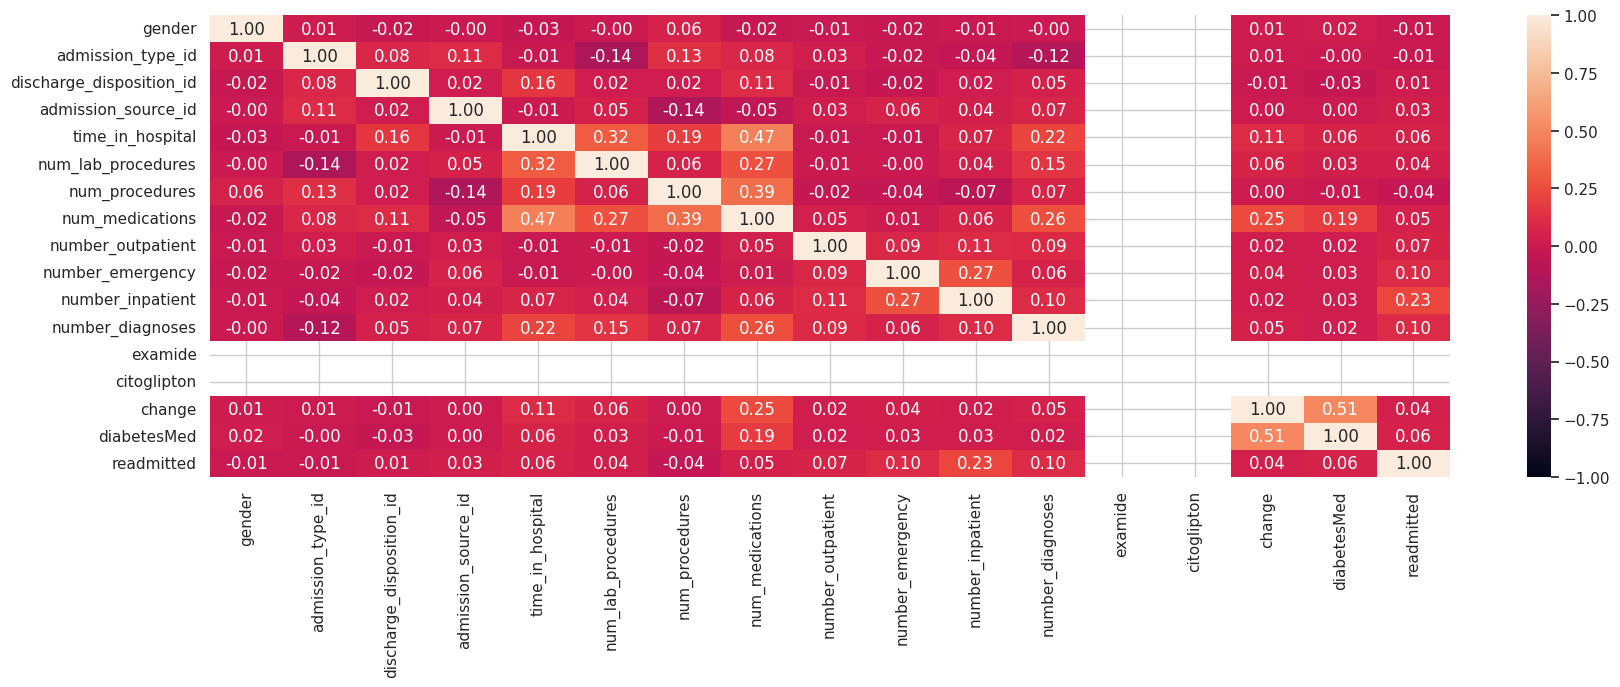

In [ ]:
plt.figure(figsize=(20, 6)) #Set size to plot
sns.heatmap(df_numeric.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f") #heatmap definition
plt.show() # Plot

# Modelling

### Helper Functions

In [ ]:
# defining a function to compute different metrics to check performance of a classification model built using sklearn
def model_performance_classification_sklearn(model, predictors, target):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "Accuracy": acc,
            "Recall": recall,
            "Precision": precision,
            "F1": f1,
        },
        index=[0],
    )

    return df_perf

In [ ]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

### Apply One-Hot Encoding

In [ ]:
# Apply One-Hot Encoding to categorical columns.
categorical_columns = data_diabetes.select_dtypes(include=['object', 'category']).columns.tolist()
data_diabetes_encoded = pd.get_dummies(data_diabetes, columns=categorical_columns)

### Split data

In [ ]:
y = data_diabetes_encoded['diabetesMed']
X = data_diabetes_encoded.drop('diabetesMed', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Training set size: {X_train.shape}")
print(f"Test set size: {X_test.shape}")

Training set size: (81412, 74)
Test set size: (20354, 74)


In [ ]:
y.value_counts(1)

diabetesMed
1    0.770031
0    0.229969
Name: proportion, dtype: float64

In [ ]:
X.head()

,gender,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,...,diag_3_grouped_2,diag_3_grouped_3,diag_3_grouped_4,diag_3_grouped_5,diag_3_grouped_6,diag_3_grouped_7,diag_3_grouped_8,diag_3_grouped_9,diag_3_grouped_E,diag_3_grouped_V
0,0,6,25,1,1,41,0,1,0,0,...,True,False,False,False,False,False,False,False,False,False
1,0,1,1,7,3,59,0,18,0,0,...,True,False,False,False,False,False,False,False,False,False
2,0,1,1,7,2,11,5,13,2,0,...,False,False,False,False,False,False,False,False,False,True
3,1,1,1,7,2,44,1,16,0,0,...,False,False,True,False,False,False,False,False,False,False
4,1,1,1,7,1,51,0,8,0,0,...,True,False,False,False,False,False,False,False,False,False


**Observations**

* We have more 77% more data about patients with diabetes

### Model evaluation criterion

#### Model assumptions

#### The model can make wrong predictions as:
1. Predicting a person doesn't have diabetes and the person has diabetes.
2. Predicting a person has diabetes, and the person doesn't have diabetes.

#### Which case is more important?
* Predicting a person doesn't have diabetes, and the person has diabetes.

#### Which metric to optimize?
* We would want Recall to be maximized, the greater the Recall higher the chances of minimizing false negatives because if a model predicts that a person is at risk of diabetes and in reality, that person doesn't have diabetes then that person can go through further levels of testing to confirm whether the person is actually at risk of diabetes but if we predict that a person is not at risk of diabetes but the person is at risk of diabetes then that person will go undiagnosed and this would lead to further health problems.

### Logistic Regression

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

#Train the model
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred_log_reg = log_reg.predict(X_test)

In [ ]:
class_report_log_reg = classification_report(y_test, y_pred_log_reg)
print("Logistic Regression Ranking Report:")
print(class_report_log_reg)

Logistic Regression Ranking Report:
              precision    recall  f1-score   support

           0       0.57      0.27      0.37      4681
           1       0.81      0.94      0.87     15673

    accuracy                           0.79     20354
   macro avg       0.69      0.61      0.62     20354
weighted avg       0.76      0.79      0.76     20354



In [ ]:
#Calculating different metrics
logreg_model_train_perf=model_performance_classification_sklearn(log_reg,X_train,y_train)
print("Training performance:\n",logreg_model_train_perf)
logreg_model_test_perf=model_performance_classification_sklearn(log_reg,X_test,y_test)
print("Testing performance:\n",logreg_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.783717  0.937885   0.810867  0.869763
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.786135  0.939705   0.812086  0.871247


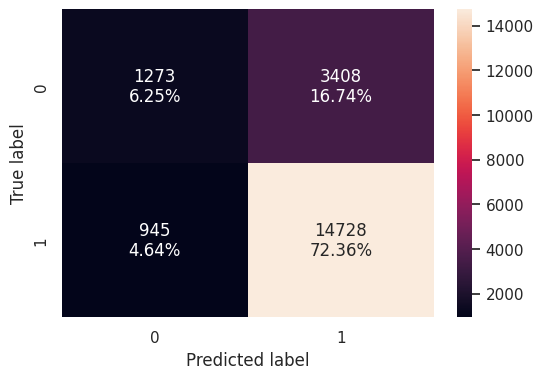

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(log_reg, X_test, y_test)

**Observations**

* The cases without diabetes (class 0), 1273 were incorrectly classified as diabetic (false positives), while 3408 were correctly classified (true negatives).
* The cases with diabetes (class 1), 945 were incorrectly classified as non-diabetic (false negatives), and 14,728 were correctly classified (true positives).
* This means that the model tends to classify cases as diabetic, which could be a consequence of class imbalance if there are many more diabetic cases than non-diabetic cases in the data set.

#### ROC-AUC Curve

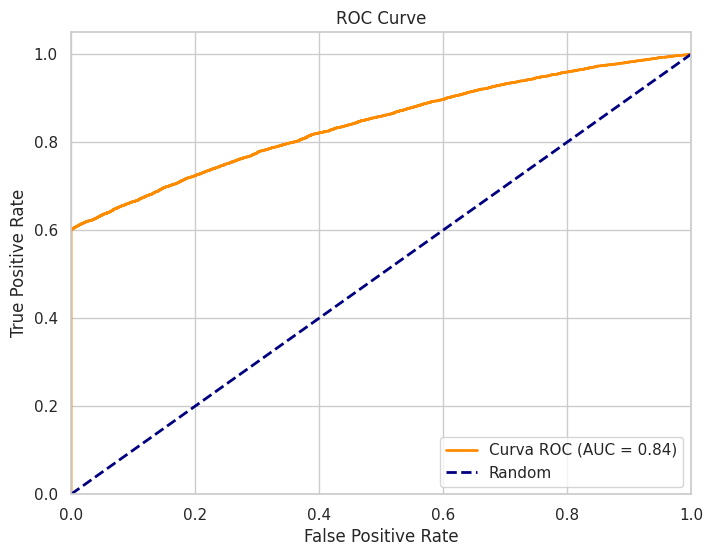

In [ ]:
y_probs = log_reg.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_probs)

#To calculate ROC AUC
roc_auc = auc(fpr, tpr)

# To graph
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'Curva ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

* The ROC Curve indicate a very good performance of the classification model. In the context of predicting  diabetes, an AUC of 0.84 suggests that our model has a good ability to distinguish between patients who do and do not have diabetes.

In [ ]:
log_reg = LogisticRegression(max_iter=1000)
scores = cross_val_score(log_reg, X, y, cv=10, scoring='roc_auc')  # Cambia 'roc_auc' a otra métrica si es necesario
print("AUC scores for each fold are:", scores)
print("Average AUC across all folds:", scores.mean())

AUC scores for each fold are: [0.80629245 0.81967007 0.7910284  0.82898491 0.83022453 0.85467419
 0.86522253 0.85832946 0.84990811 0.85046302]
Average AUC across all folds: 0.8354797655981752


* Cross-validation results with an AUC of 0.84 confirms that it could be a good model.

#### Interpretability - Odds ratio


In [ ]:
# Get the model coefficients and the intercept
coefficients = log_reg.coef_[0]
intercepto = log_reg.intercept_[0]

features_names = X_train.columns  # Asumiendo que X_train es un DataFrame

print("Intercepto:", intercepto)
for coef, name in zip(coefficients, features_names):
    print(name, ':', coef)

# To calculate the odd ratio
odds_ratios = np.exp(coefficients)

print("\nOdds Ratios:")
for name, odds_ratio in zip(features_names, odds_ratios):
    print(name, ':', odds_ratio)

Intercepto: 0.0754059494275836
gender : 0.0978368210332528
admission_type_id : -0.023171957083740754
discharge_disposition_id : -0.01637413702434012
admission_source_id : 0.0022006782070943458
time_in_hospital : -0.025195185651036813
num_lab_procedures : -0.0029603200177000283
num_procedures : -0.06625118551769324
num_medications : 0.05124640015869885
number_outpatient : -0.0033015357943565965
number_emergency : -0.005170219169938619
number_inpatient : 0.009459248511887458
number_diagnoses : -0.028665742505942362
examide : 0.0
citoglipton : 0.0
change : 8.17280940130445
readmitted : 0.14604408750947845
race_AfricanAmerican : 0.048711202120544084
race_Asian : -0.07887591668455103
race_Caucasian : -0.033314761652031635
race_Hispanic : -0.06290624127135779
race_Other : 0.18990777469597464
age_[0-10) : 0.8103468660281554
age_[10-20) : 0.7548639928327333
age_[20-30) : -0.08787766739545023
age_[30-40) : -0.34741297036809315
age_[40-50) : -0.3039396348771719
age_[50-60) : -0.18824016817557712

**Observations**

**Based on the coefficients and odds ratios**

* A positive intercept suggests that the log likelihood of the outcome variable (in this case, probably the presence of diabetes) is slightly positive when all other variables are zero.

* The positive coefficient for "gender" indicates that the gender variable has a positive impact on the log probability of having diabetes. The odds ratio greater than 1 suggests that gender categorized in this way is associated with an increased probability of having diabetes.

* Negative coefficients for variables such as "time_in_hospital" and "num_procedures" indicate that as these increase, the log probability of having diabetes decreases.

* The positive coefficient indicates that the greater the number of medications administered, the greater the probability of having diabetes, which could reflect a greater burden of disease.

* Age categories have different impacts. The younger age categories have significant positive coefficients (particularly [0-10) and [10-20)). This may be due to incorrect coding or biased sampling. Older ages have negative coefficients, suggesting a lower probability of diabetes compared to the reference category, which is interesting and may require further analysis to understand why.

* The variables "diag_1_grouped", "diag_2_grouped" and "diag_3_grouped" represent different grouped diagnoses. The mixed coefficients suggest that certain diagnostic groups are associated with an increase in the probability of diabetes, while others are associated with a decrease.

* The extremely high coefficient for "change" suggests that when there is a change in medication regimen, the likelihood of diabetes increases dramatically. This coefficient appears abnormally high and could be an indicator of overfitting or an error in the data or interpretation.

* Coefficients of 0 for "examide" and "citoglipton" indicate that there is no change in the log odds of diabetes when these variables change, suggesting that these medications are not present or have no variation in your data set.

### Decision Tree

In [ ]:
tree_clf = DecisionTreeClassifier(random_state=42)

#Train the model
tree_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_tree = tree_clf.predict(X_test)

In [ ]:
#Calculating different metrics
tree_model_train_perf=model_performance_classification_sklearn(tree_clf,X_train,y_train)
print("Training performance:\n",tree_model_train_perf)
tree_model_test_perf=model_performance_classification_sklearn(tree_clf,X_test,y_test)
print("Testing performance:\n",tree_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999988  0.999984        1.0  0.999992
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.755822  0.842085   0.841012  0.841548


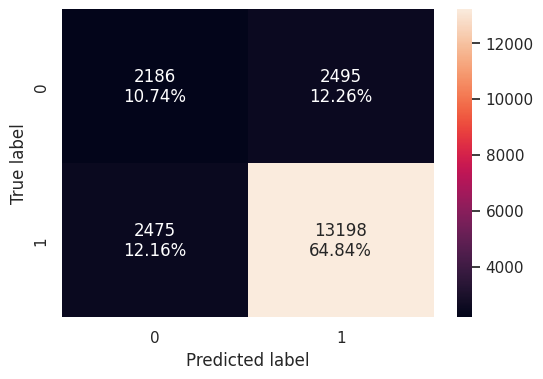

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(tree_clf, X_test, y_test)

**Observations**

* The disparity between performance on training and test data indicates possible overfitting. This means that the model has learned to predict perfectly the data it was trained on, but does not generalize well to new data.

* The generalization capacity of the model is moderate. Although 75.58% accuracy in the test data is acceptable.

* The model appears to have better recall than precision, meaning that it is better at identifying all patients with diabetes at the cost of incorrectly classifying some non-diabetics as diabetics.

#### Interpretability - Tree


In [ ]:
# Text report showing the rules of a decision tree -
feature_names = list(X_train.columns)
print(tree.export_text(tree_clf,feature_names=feature_names,show_weights=True))

|--- change <= 0.50
|   |--- num_medications <= 7.50
|   |   |--- num_medications <= 3.50
|   |   |   |--- number_diagnoses <= 2.50
|   |   |   |   |--- time_in_hospital <= 1.50
|   |   |   |   |   |--- num_medications <= 2.50
|   |   |   |   |   |   |--- age_[30-40) <= 0.50
|   |   |   |   |   |   |   |--- weights: [12.00, 0.00] class: 0
|   |   |   |   |   |   |--- age_[30-40) >  0.50
|   |   |   |   |   |   |   |--- medical_specialty_InternalMedicine <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   |   |--- medical_specialty_InternalMedicine >  0.50
|   |   |   |   |   |   |   |   |--- weights: [1.00, 0.00] class: 0
|   |   |   |   |   |--- num_medications >  2.50
|   |   |   |   |   |   |--- diag_1_grouped_2 <= 0.50
|   |   |   |   |   |   |   |--- admission_type_id <= 2.50
|   |   |   |   |   |   |   |   |--- num_lab_procedures <= 1.50
|   |   |   |   |   |   |   |   |   |--- weights: [0.00, 1.00] class: 1
|   |   |   |   |   |   

In [ ]:
from sklearn.tree import export_graphviz

export_graphviz(
    tree_clf,
    out_file="tree.dot",
    feature_names=feature_names,  # Asegúrate de que esta lista tenga los nombres correctos de tus características
    class_names=["No diabetes", "Diabetes"],  # O los nombres de clases apropiados
    rounded=True,
    filled=True
)

In [ ]:
import graphviz

# Cargar el archivo .dot y visualizarlo
with open("tree.dot") as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)

In [ ]:
from IPython.display import Image
Image(filename='tree.png')

### Random Forest Classifier

In [ ]:
rf_clf = RandomForestClassifier(random_state=42)

# Train the model
rf_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_clf.predict(X_test)

In [ ]:
#Calculating different metrics
rf_model_train_perf=model_performance_classification_sklearn(rf_clf,X_train,y_train)
print("Training performance:\n",rf_model_train_perf)
rf_model_test_perf=model_performance_classification_sklearn(rf_clf,X_test,y_test)
print("Testing performance:\n",rf_model_test_perf)

Training performance:
    Accuracy    Recall  Precision        F1
0  0.999988  0.999984        1.0  0.999992
Testing performance:
    Accuracy    Recall  Precision        F1
0  0.787265  0.932304    0.81718  0.870954


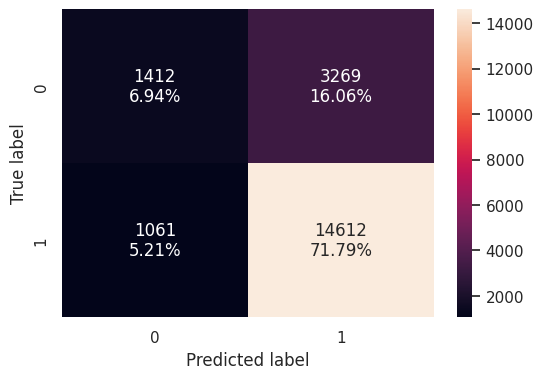

In [ ]:
#Creating confusion matrix
confusion_matrix_sklearn(rf_clf, X_test, y_test)

**Observations**

* There appears to be considerable overfitting in the Random Forest model. This is evidenced by the high accuracy in the training data compared to the testing data.

* The recall in the test (approximately 93.23%) is relatively high, which indicates that the model is good at identifying positive cases of diabetes.

* Accuracy on the test has decreased (approximately 81.71%), suggesting that there are a considerable number of false positives, that is, patients without diabetes who are incorrectly classified as diabetic by the model.

* The model seems to lean towards high recall at the expense of precision.

####Intepretability - Feature Importance

Importance of features:
change                      0.212692
num_medications             0.092048
num_lab_procedures          0.084284
time_in_hospital            0.051047
number_diagnoses            0.040098
num_procedures              0.034687
discharge_disposition_id    0.031796
admission_type_id           0.025036
number_inpatient            0.023816
admission_source_id         0.023111
dtype: float64


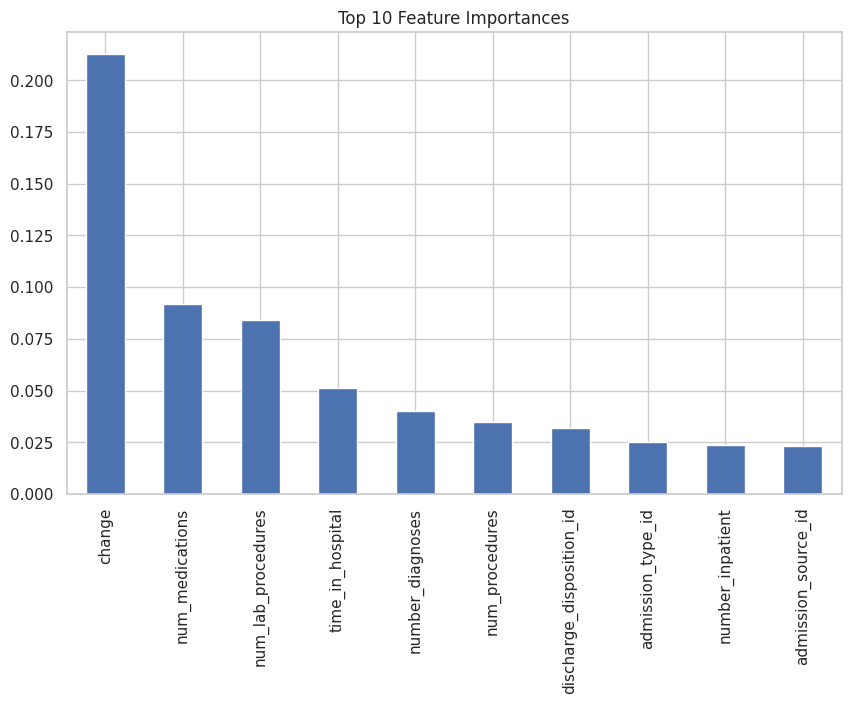

In [ ]:
feature_importances = rf_clf.feature_importances_
importances_series = pd.Series(feature_importances, index=X_train.columns)

# To show the top 10
top_importances = importances_series.sort_values(ascending=False)[:10]
print("Importance of features:")
print(top_importances)

plt.figure(figsize=(10, 6))
top_importances.plot(kind='bar')
plt.title('Top 10 Feature Importances')
plt.show()

**Observations**
*  'Change'  is the most important characteristic depending on the model. It appears that having or not having a change in the patient's medication is a significant factor in predicting diabetes.

* "num_medications") is the second most important characteristic. This could suggest that patients taking more medications have a higher likelihood of being diagnosed with diabetes, which could reflect a higher disease burden or more diabetes-related complications.

* "num_lab_procedures" is also an important predictor, which makes sense since patients with diabetes may require more laboratory tests to monitor their condition.

* A longer hospital stay influences the prediction, which may be related to the severity of diabetes or the presence of complications.

* "number_diagnoses" a greater number of diagnoses contributes significantly to the prediction, which could indicate that patients with multiple medical conditions are more likely to have diabetes.

* "num_procedures" and "discharge_disposition_id", also influence the prediction, which could be related to the management of the patient and their discharge from the hospital.

### Model Comparison

In [ ]:
# training performance comparison

models_train_comp_df = pd.concat(
    [logreg_model_train_perf.T,tree_model_train_perf.T,rf_model_train_perf.T],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest Estimator"]
print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


,Logistic Regression,Decision Tree,Random Forest Estimator
Accuracy,0.783717,0.999988,0.999988
Recall,0.937885,0.999984,0.999984
Precision,0.810867,1.000000,1.000000
F1,0.869763,0.999992,0.999992


In [ ]:
# testing performance comparison
models_test_comp_df = pd.concat(
    [logreg_model_test_perf.T,tree_model_test_perf.T,rf_model_test_perf.T],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression",
    "Decision Tree",
    "Random Forest Estimator"]
print("Testing performance comparison:")
models_test_comp_df

Testing performance comparison:


,Logistic Regression,Decision Tree,Random Forest Estimator
Accuracy,0.786135,0.755822,0.787265
Recall,0.939705,0.842085,0.932304
Precision,0.812086,0.841012,0.817180
F1,0.871247,0.841548,0.870954


**Observations**

* The Logistic Regression model provides a good balance between precision and recall and is easy to interpret. Furthermore, its F1 score is quite high compared to the other models, indicating a good balance between precision and recall. If interpretability and explainability are important to the clinical context, this might be the preferred model.

* Although the decision tree has almost perfect performance on the training set, its performance on the testing set is significantly lower. This suggests that the model may be overfitted and does not generalize well to unseen data.

* Random Forest shows signs of overfitting, with perfect performance in training but diminished in testing. However, it offers better overall performance than the decision tree and could be a robust choice given its overall performance and lower probability of overfitting compared to individual decision trees.

* Given the above, and if the performance metrics are similar across the test set, We would prefer logistic regression for its ease of interpretation and good overall performance.